In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (14, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Loading Dataset

In [15]:
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [16]:
df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

Visualization data

In [17]:
fig = px.histogram(df,x='Family Size',y='Spending Score',nbins=40,title="Relationship between family size and spending score")
fig.update_layout(bargap = 0.2)
fig.show()

In [18]:
px.histogram(df, x='Gender',
            y = 'Spending Score',
            title='Relationship between spending score and gender',
            color='Gender')

In [19]:
px.violin(df,x='Gender',y='Annual Income',color='Gender',title="Annual income vs gender")

In [20]:
px.scatter(df,x='Annual Income',y = 'Spending Score',color='Gender',title="Annual income vs spending score")

Correlation between annual income and spending score

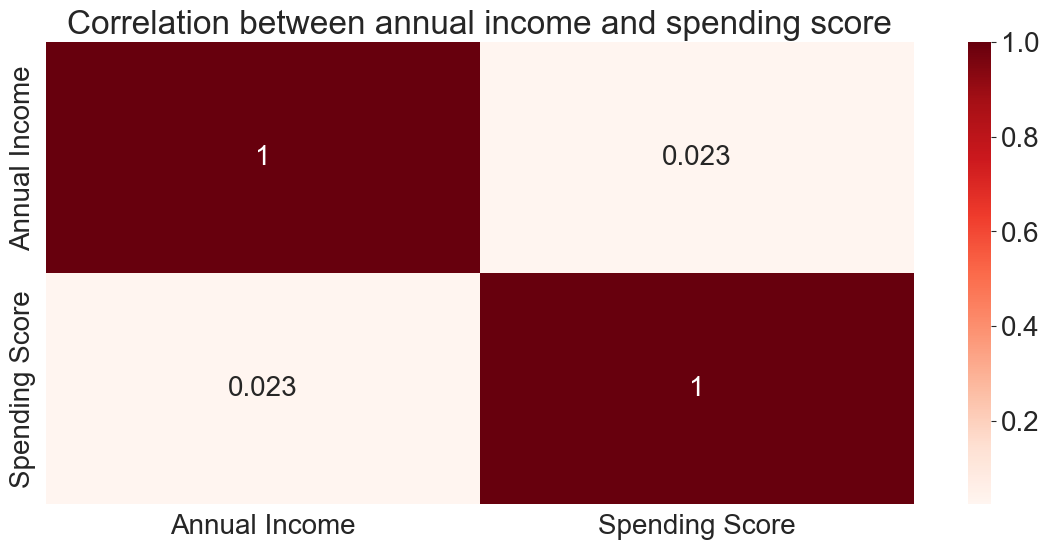

In [21]:
sns.heatmap(df[['Annual Income','Spending Score']].corr(),cmap = 'Reds',annot=True)
plt.title("Correlation between annual income and spending score")
plt.show()

Preprocessing Data

In [22]:
mapping = {'Male':0,'Female':1}
df['Gender'] = df['Gender'].map(mapping)

In [46]:
input_data = ['Gender','Age','Annual Income','Spending Score','Work Experience','Family Size']
data = df[input_data].copy()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [63]:
pca_data[:3]

array([[ 1.78899463, -0.12341435],
       [ 1.5749967 ,  1.05140756],
       [ 1.71028021, -0.49052825]])

# K-means algorithms

In [50]:
# Create random k centroids
def random_centroids(data,k):
    centroids = data[np.random.choice(data.shape[0],k, replace=False)]
    return centroids

# Label each data point
def get_labels(data,centroids,k):
    distances = np.zeros((data.shape[0], k))
    for i in range(k):
        distances[:, i] =  np.linalg.norm(data - centroids[i], axis=1)
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def new_centroids(data,labels,k):
    centroids = np.empty((k,2))
    for i in range(k):
        centroids[i] = np.mean(data[labels == i], axis=0)
    return centroids

Plot K-means Iterations

In [51]:
from IPython.display import clear_output

def plot_clusters(data,labels,centroids,iteration):
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data[:,0],y=data[:,1],c=labels,cmap='viridis')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.scatter(x=centroids[:,0],y=centroids[:,1],marker="*",color = 'red',s = 100)
    plt.show()

Pulling algorithms together

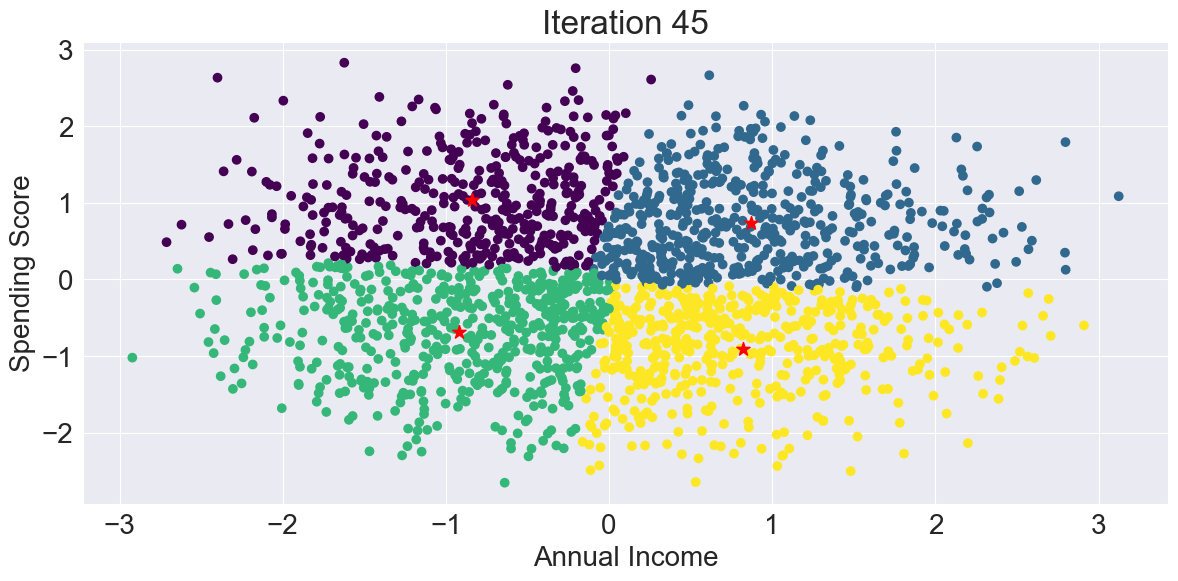

In [52]:
max_iterations = 100
k = 4
centroids = random_centroids(pca_data,k)
iteration = 1
old_centroids = np.empty((k,2))
while iteration < max_iterations and not np.allclose(old_centroids,centroids):
    old_centroids = centroids
    labels = get_labels(pca_data,centroids,k)
    centroids = new_centroids(data=pca_data,labels=labels,k=k)
    plot_clusters(pca_data,labels,centroids,iteration)
    iteration += 1